In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Data

In [1]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
X = iris.data[ ["petal width (cm)"]].values
X.shape

(150, 1)

In [3]:
y = iris.target_names[iris.target] == 'virginica'
# y

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2025)

# Logistic regression model

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=10)

log_reg.fit(X_train, y_train)

LogisticRegression(C=10)

# Confusion Matrix

In [ ]:
# confusion matrix for training set

from sklearn.metrics import confusion_matrix

y_train_pred = log_reg.predict(X_train)

confusion_matrix(y_train, y_train_pred)

array([[77,  1],
       [ 2, 32]])

In [8]:
# confusion matrix for testing set

y_test_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_test_pred)


array([[21,  1],
       [ 2, 14]])

## Precision and recall scores

In [9]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_test_pred)

0.9333333333333333

In [11]:
recall_score(y_test, y_test_pred)

0.875

# Precision recall curve

In [12]:
# decision_function
X_new = [[1]]
log_reg.decision_function(X_new)

array([-5.75048039])

In [13]:
log_reg.predict_proba(X_new)

array([[0.99682884, 0.00317116]])

In [14]:
log_reg.predict(X_new)

array([False])

In [15]:
from sklearn.metrics import precision_recall_curve

decision_func_train = log_reg.decision_function(X_train)

precisions, recalls, thresholds = precision_recall_curve(y_train, decision_func_train)


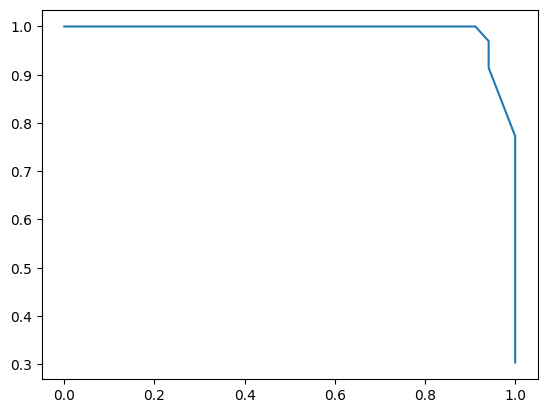

In [18]:
plt.plot(recalls, precisions)
plt.show()

In [19]:
thresholds

array([-13.8326964 , -12.9346724 , -12.0366484 , -11.1386244 ,
        -5.75048039,  -4.85245639,  -3.95443239,  -3.05640839,
        -2.15838439,  -1.26036039,  -0.36233639,   0.53568761,
         1.43371162,   2.33173562,   3.22975962,   4.12778362,
         5.02580762,   5.92383162,   6.82185562,   7.71987962])

# ROC curve

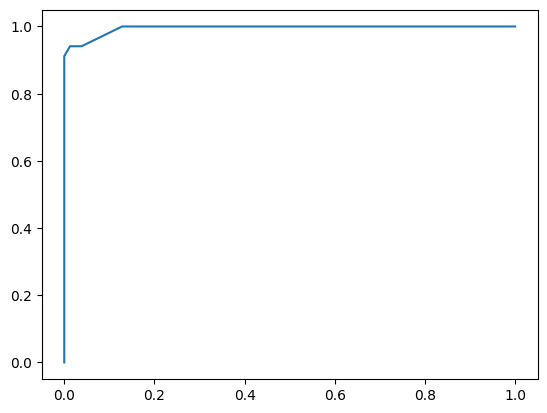

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, decision_func_train)

plt.plot(fpr, tpr)
plt.show()